In [ ]:
#default_exp experiments_2

# Experiments

> refactor modelling, experiment functionality

In [ ]:
#export
from torchtools.core import *
from torchtools.data import *
from torchtools.models import *
from torchtools.datasets import *
from torchtools.augmentations import *
from torchtools.datablock import *
from torchtools.dataloader import *
from torchtools.experiments import *
from torchtools.configs import *

In [ ]:
#export
import pandas as pd
import numpy as np
from fastai2.basics import *

### Worklflow with Discrete Variables

In [ ]:
COL_CONFIG = 'config2.json'

In [ ]:
# #export
# ## data config
# ds_fn = 'bi_sample_anon.csv'
# ds_path = Path('./data/custom')

# trn_end = 120000
# val_end = 160000
# test_end = 200000
# splits = (L(range(trn_end)), L(range(trn_end, val_end)))
# ds_config = f'{int(trn_end/1000)}_{int(val_end/1000)}_{int(test_end/1000)}'

# col_config = '6chan_anon_discrete'
# cols_c, cols_d, cols_y, n_train = get_discrete_config()

# ds_source = Path(ds_fn).stem
# ds_full_path = Path(Path(ds_path)/ds_fn)

# dataset_name = f'{ds_source}_{col_config}_{cols_y}_{ds_config}'



# data_params = defaultdict(lambda:None, {'ds_fn':ds_fn, 'ds_path':ds_path, 'trn_end':trn_end, 'val_end':val_end, 'splits':splits,
#               'col_config':col_config, 'cols_c':cols_c, 'cols_d':cols_d, 'cols_y':cols_y, 
#                'ds_full_path':ds_full_path, 'dataset_name':dataset_name})

In [ ]:
#export
df_path = Path('./data/custom/bi_sample_anon.csv')

In [ ]:
#export
## column configuration as dict, eventually move to separate configuration file
col_config = defaultdict(lambda:None)
col_config['cols_c'] = [[f'x{i}_{j}' for j in range(10)] for i in [0,1,3,4]]
col_config['cols_d'] = [[f'x{i}_{j}' for j in range(10)] for i in [2,5]]
col_config['cols_y']= 'y0'
col_config['id']='anon10hc_4c_2d_y'  ## put it all in one config file with this unique identifier

In [ ]:
#export
## column configuration as dict, eventually move to separate configuration file
col_config = defaultdict(lambda:None)
col_config['cols_c'] = [[f'x{i}_{j}' for j in range(10)] for i in [0,1,2,3,4,5]]
# col_config['cols_d'] = [[f'x{i}_{j}' for j in range(10)] for i in [2,5]]
col_config['cols_d'] = None
col_config['cols_y']= 'y0'
col_config['id']='anon10hc_6c_y'  ## put it all in one config file with this unique identifier

In [ ]:
col_config = read_config('anon10hc_6c_y', COL_CONFIG)

In [ ]:
data_params = build_data_params(df_path, col_config=col_config, nrows=25000, bs=256)

In [ ]:
data_params.keys()

dict_keys(['df_path', 'splits', 'col_config_id', 'cols_c', 'cols_d', 'cols_y', 'bs', 'nrows'])

In [ ]:
train_params.keys()

dict_keys(['arch', 'n_epochs', 'max_lr', 'wd', 'loss_fn_name', 'alpha', 'metrics', 'N', 'magnitude', 'seed', 'pct_start', 'div_factor', 'aug'])

In [ ]:
train_params['metrics']=[unweighted_profit, unweighted_profit_05]

In [ ]:
ts_experiment = TSExperiments()

ts_experiment.setup_data(data_params)

ts_experiment.setup_training(train_params)

(25000, 6, 10)
<class 'torchtools.dataloader.TSDatasets3'>
2


In [ ]:
train_params['aug'] = 'randaugment'
train_params['verbose']=False
train_params['n_epochs']=1
train_params['max_lr']=1e-3
train_params['wd']=0.001
train_params['arch'] = InceptionTimeSgm

In [ ]:
hypers = {'wd':[0.001, 0.1]}

In [ ]:
df_results_fn = 'results_exploration.csv'
ts_experiment.run_grid_search(hypers, df_results_fn)

{'arch': <class 'torchtools.models.InceptionTimeSgm'>, 'n_epochs': 1, 'max_lr': 0.001, 'wd': 0.001, 'loss_fn_name': 'leaky_loss', 'alpha': 0.5, 'metrics': [<function unweighted_profit at 0x7fd5c0cf6f80>, <function unweighted_profit_05 at 0x7fd5c0d0ae60>], 'N': 3, 'magnitude': 0.4, 'seed': 1234, 'pct_start': 0.3, 'div_factor': 25.0, 'aug': 'randaugment', 'bs': 256, 'ds_id': 'bi_sample_anon_anon10hc_6c_y_y0_19_24', 'verbose': False}
pct_start: 0.3 div_factor: 25.0
[TSStandardize: (TSTensor,object) -> encodes
(NumpyTensor,object) -> encodes ]
Pipeline: TSStandardize Pipeline: TSStandardize
randaugment
False
functools.partial(<function leaky_loss at 0x7fd5c0cf6950>, alpha=0.5)
Pipeline: RandAugment -> TSStandardize
wd: 0.001 0.001


epoch,train_loss,valid_loss,unweighted_profit,unweighted_profit_05,time
0,0.359916,0.517348,-0.759379,-0.425127,00:05


not new
{'arch': <class 'torchtools.models.InceptionTimeSgm'>, 'n_epochs': 1, 'max_lr': 0.001, 'wd': 0.1, 'loss_fn_name': 'leaky_loss', 'alpha': 0.5, 'metrics': [<function unweighted_profit at 0x7fd5c0cf6f80>, <function unweighted_profit_05 at 0x7fd5c0d0ae60>], 'N': 3, 'magnitude': 0.4, 'seed': 1234, 'pct_start': 0.3, 'div_factor': 25.0, 'aug': 'randaugment', 'bs': 256, 'ds_id': 'bi_sample_anon_anon10hc_6c_y_y0_19_24', 'verbose': False}
pct_start: 0.3 div_factor: 25.0
[TSStandardize: (TSTensor,object) -> encodes
(NumpyTensor,object) -> encodes ]
Pipeline: TSStandardize Pipeline: TSStandardize
randaugment
False
functools.partial(<function leaky_loss at 0x7fd5c0cf6950>, alpha=0.5)
Pipeline: RandAugment -> TSStandardize
wd: 0.1 0.1


epoch,train_loss,valid_loss,unweighted_profit,unweighted_profit_05,time
0,0.237175,0.643638,-0.829003,-0.649372,00:06


not new


In [ ]:
df_results_fn = 'results_exploration.csv'
ts_experiment.run_grid_search(hypers, df_results_fn=df_results_fn)

{'arch': <class 'torchtools.models.InceptionTimeSgm'>, 'n_epochs': 5, 'max_lr': 0.1, 'wd': 3, 'loss_fn_name': 'leaky_loss', 'alpha': 0.5, 'metrics': [<function unweighted_profit at 0x7f78dc5fae60>, <function unweighted_profit_05 at 0x7f78dc615d40>], 'N': 3, 'magnitude': 0.4, 'seed': 1234, 'pct_start': 0.3, 'div_factor': 25.0, 'aug': 'augmix', 'bs': 256, 'ds_id': 'bi_sample_anon_anon10hc_6c_y_y0_19_24', 'verbose': False}
pct_start: 0.3 div_factor: 25.0
[TSStandardize: (TSTensor,object) -> encodes
(NumpyTensor,object) -> encodes ]
Pipeline: TSStandardize Pipeline: TSStandardize
augmix
tfms None
augmix order 90
False
functools.partial(<function leaky_loss at 0x7f78dc5fa830>, alpha=0.5)
Pipeline: AugmixSS -> TSStandardize
wd: 3


epoch,train_loss,valid_loss,unweighted_profit,unweighted_profit_05,time
0,-0.284919,-0.461597,0.000000,0.000000,00:05
1,-0.476046,-0.463124,0.000000,0.000000,00:05
2,-0.301577,-0.463611,0.000000,0.000000,00:05
3,-0.470354,-0.468471,0.000000,0.000000,00:06
4,-0.392409,-0.468525,0.000000,0.000000,00:07


not new


In [ ]:
RandAugment??

In [ ]:
df_results_fn = 'results_exploration.csv'
ts_experiment.run_experiment(df_fn=df_results_fn)

pct_start: 0.3 div_factor: 25.0
[TSStandardize: (TSTensor,object) -> encodes
(NumpyTensor,object) -> encodes ]
Pipeline: TSStandardize Pipeline: TSStandardize
augmix
tfms None
augmix order 90
False
mean: tensor([[[-1.2869],
         [-0.7260],
         [-1.7377],
         [-1.0197]]], device='cuda:0')  std: tensor([[[85.0376],
         [63.3184],
         [84.6153],
         [63.2969]]], device='cuda:0')

functools.partial(<function leaky_loss at 0x7fd88c5a88c0>, alpha=0.5)
Pipeline: TSStandardize -> AugmixSS


epoch,train_loss,valid_loss,unweighted_profit,unweighted_profit_05,time
0,0.024929,0.188656,0.357810,0.000000,00:09


standardize encodes
weights [0.12069069 0.55244944 0.32685987], m 0.4964742723937071
ops in step 0 [TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timestepzero
randtimestep
yscale
ops in step 1 [RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randomcrop
yscale
ops in step 2 [TimeNormal: (TSTensor,object) -> encodes ]
timenormal torch.Size([64, 4, 10])
standardize encodes
weights [0.09596037 0.3006876  0.60335203], m 0.9468840301872898
ops in step 0 [Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomin
ops in step 1 [TimeNormal: (TSTensor,object) -> encodes
 Dimout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timenormal torch.Size([64, 4, 10])
dimout
ops in step 2 [RandZoom:

ops in step 2 [Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
cutout
standardize encodes
weights [0.01022138 0.53941045 0.45036816], m 0.1464462009093529
ops in step 0 [Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
cutout
yscale
ywarp
ops in step 1 [RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randomcrop
ynormal
zoomin
ops in step 2 [YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ynormal
maskout
standardize encodes
weights [0.24829712 0.1558643  0.59583858], m 0.6167286856285231
ops in step 0 [YWarp: (TSIntTensor,object) -> encodes
(TSTens

standardize encodes
weights [0.25868378 0.47332033 0.26799589], m 0.2180243447549431
ops in step 0 [Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
cutout
zoomout
ops in step 1 [Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
cutout
timewarp
ops in step 2 [RandZoom: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randzoom
zoomout
standardize encodes
weights [0.34879864 0.26227055 0.38893081], m 0.8823989177038448
ops in step 0 [RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randomcrop
yscale
ops in step 1 [YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Zoomin: (TSIntTensor,object) -> encodes
(TSTe

standardize encodes
weights [0.20711281 0.24608343 0.54680376], m 0.7249593110167989
ops in step 0 [YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ynormal
maskout
ops in step 1 [Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
crop
ops in step 2 [TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timestepzero
standardize encodes
weights [0.40021114 0.45960321 0.14018565], m 0.5496777319588179
ops in step 0 [RandZoom: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Dimout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimeNormal: (TSTensor,object) -> encodes ]
randzoom
dimout
timenormal torch.Size([64, 4, 10])
ops in step 1 [TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timewarp
ops in step 2 [Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
cutout
standardize encodes
w

standardize encodes
weights [0.40335788 0.11736629 0.47927583], m 0.7180409641406919
ops in step 0 [Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandZoom: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
cutout
randzoom
zoomout
ops in step 1 [Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomout
randomcrop
ops in step 2 [Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
cutout
standardize encodes
weights [0.44138191 0.45555748 0.10306061], m 0.30342647375637277
ops in step 0 [Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
cutout
ops in step 1 [RandZoom: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Maskout: (TSIntTensor,object) -> encodes
(TSTensor,o

ops in step 1 [YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ywarp
cutout
ops in step 2 [YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandZoom: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
yscale
timewarp
randzoom
standardize encodes
weights [0.12716684 0.31194418 0.56088898], m 0.10124799182249722
ops in step 0 [Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
maskout
cutout
ops in step 1 [Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
crop
ops in step 2 [TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timestepzero
standardize encodes
weights [0.19571407 0.72920589 0.07508004], m 0.09081577805539236
ops in step 0 [RandomCrop: (TSIntTensor

standardize encodes
weights [0.56380142 0.00349626 0.43270233], m 0.6543468555054801
ops in step 0 [Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
crop
ops in step 1 [Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
maskout
timewarp
ops in step 2 [TimeNormal: (TSTensor,object) -> encodes ]
timenormal torch.Size([64, 4, 10])
standardize encodes
weights [0.28782806 0.59703565 0.1151363 ], m 0.018771564543713835
ops in step 0 [Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
maskout
zoomin
ops in step 1 [Dimout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
dimout
ynormal
ops in step 2 [RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Cutout: (TSIntTensor,object) -> en

ops in step 2 [TimeNormal: (TSTensor,object) -> encodes ]
timenormal torch.Size([64, 4, 10])
standardize encodes
weights [0.48580451 0.33262473 0.18157076], m 0.8007869259353572
ops in step 0 [TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timewarp
randtimestep
ops in step 1 [TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timewarp
ops in step 2 [TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timewarp
standardize encodes
weights [0.00108691 0.11054984 0.88836325], m 0.9777078538180969
ops in step 0 [RandZoom: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randzoom
timestepzero
zoomout
ops in step 1 [Dimout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
dimou

standardize encodes
weights [0.18020485 0.20799792 0.61179723], m 0.3999108793713582
ops in step 0 [TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timestepzero
ops in step 1 [TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timestepzero
maskout
ops in step 2 [YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ywarp
standardize encodes
weights [0.27214122 0.46547634 0.26238244], m 0.21525675214912474
ops in step 0 [TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Dimout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timestepzero
dimout
ops in step 1 [Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandZoom: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimeNormal: (TSTensor,object) -> encodes ]
cutout
randzoom
timenormal torch.Size([64, 4, 10])
ops in step 2 [C

standardize encodes
weights [0.46222237 0.1780564  0.35972123], m 0.3762700198190687
ops in step 0 [YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
yscale
ops in step 1 [TimeNormal: (TSTensor,object) -> encodes ]
timenormal torch.Size([64, 4, 10])
ops in step 2 [YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
yscale
crop
timestepzero
standardize encodes
weights [0.33671167 0.11082449 0.55246384], m 0.931172814880301
ops in step 0 [TimeNormal: (TSTensor,object) -> encodes ]
timenormal torch.Size([64, 4, 10])
ops in step 1 [YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ywarp
zoomin
ops in step 2 [YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ynormal
standardize encodes
standardize en

standardize encodes
standardize encodes
standardize encodes
standardize encodes
standardize encodes
standardize encodes
standardize encodes
standardize encodes
standardize encodes
standardize encodes
standardize encodes
standardize encodes
standardize encodes
standardize encodes
standardize encodes
standardize encodes
standardize encodes
standardize encodes
standardize encodes
standardize encodes
standardize encodes
standardize encodes
standardize encodes
standardize encodes
standardize encodes
standardize encodes
standardize encodes
standardize encodes
standardize encodes
standardize encodes
standardize encodes
standardize encodes
not new


In [ ]:
ts_experiment.dls.after_batch[1].order

90

In [ ]:
ts_experiment.dls.after_batch[0].order

99

In [ ]:
Pipeline??

In [ ]:
compose_tfms??

In [ ]:
df_results_fn = 'results_exploration.csv'
ts_experiment.run_experiment(df_fn=df_results_fn)

pct_start: 0.3 div_factor: 25.0
[TSStandardize: (TSTensor,object) -> encodes
(NumpyTensor,object) -> encodes ]
Pipeline: TSStandardize Pipeline: TSStandardize
augmix
tfms None
False
mean: tensor([[[-1.2869],
         [-0.7260],
         [-1.7377],
         [-1.0197]]], device='cuda:0')  std: tensor([[[85.0376],
         [63.3184],
         [84.6153],
         [63.2969]]], device='cuda:0')

functools.partial(<function leaky_loss at 0x7f940c07a7a0>, alpha=0.5)
Pipeline: TSStandardize -> AugmixSS


epoch,train_loss,valid_loss,unweighted_profit,unweighted_profit_05,time
0,-0.004669,0.215299,0.424101,0.000000,00:10
1,-0.202955,0.209595,0.426918,0.000000,00:14
2,-0.255638,0.220366,0.456302,0.000000,00:11
3,-0.471642,0.204487,0.534923,0.000000,00:10
4,-0.446360,0.203505,0.384924,0.000000,00:10


weights [0.12069069 0.55244944 0.32685987], m 0.4964742723937071
ops in step 0 [TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timestepzero
randtimestep
yscale
ops in step 1 [RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randomcrop
yscale
ops in step 2 [TimeNormal: (TSTensor,object) -> encodes ]
timenormal torch.Size([64, 4, 10])
weights [0.09596037 0.3006876  0.60335203], m 0.9468840301872898
ops in step 0 [Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomin
ops in step 1 [TimeNormal: (TSTensor,object) -> encodes
 Dimout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timenormal torch.Size([64, 4, 10])
dimout
ops in step 2 [RandZoom: (TSIntTensor,object) -> encodes
(TSTens

weights [0.01022138 0.53941045 0.45036816], m 0.1464462009093529
ops in step 0 [Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
cutout
yscale
ywarp
ops in step 1 [RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randomcrop
ynormal
zoomin
ops in step 2 [YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ynormal
maskout
weights [0.24829712 0.1558643  0.59583858], m 0.6167286856285231
ops in step 0 [YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ywarp
yscale
ops in step 1 [YScale: (TS

weights [0.25868378 0.47332033 0.26799589], m 0.2180243447549431
ops in step 0 [Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
cutout
zoomout
ops in step 1 [Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
cutout
timewarp
ops in step 2 [RandZoom: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randzoom
zoomout
weights [0.34879864 0.26227055 0.38893081], m 0.8823989177038448
ops in step 0 [RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randomcrop
yscale
ops in step 1 [YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
yscale
zoomin


weights [0.20711281 0.24608343 0.54680376], m 0.7249593110167989
ops in step 0 [YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ynormal
maskout
ops in step 1 [Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
crop
ops in step 2 [TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timestepzero
weights [0.40021114 0.45960321 0.14018565], m 0.5496777319588179
ops in step 0 [RandZoom: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Dimout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimeNormal: (TSTensor,object) -> encodes ]
randzoom
dimout
timenormal torch.Size([64, 4, 10])
ops in step 1 [TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timewarp
ops in step 2 [Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
cutout
weights [0.20439992 0.65464648 0.1409536 ], m 0.7902425357485

weights [0.40335788 0.11736629 0.47927583], m 0.7180409641406919
ops in step 0 [Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandZoom: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
cutout
randzoom
zoomout
ops in step 1 [Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomout
randomcrop
ops in step 2 [Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
cutout
weights [0.44138191 0.45555748 0.10306061], m 0.30342647375637277
ops in step 0 [Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
cutout
ops in step 1 [RandZoom: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randzoom
ynormal
mas

randzoom
weights [0.12716684 0.31194418 0.56088898], m 0.10124799182249722
ops in step 0 [Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
maskout
cutout
ops in step 1 [Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
crop
ops in step 2 [TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timestepzero
weights [0.19571407 0.72920589 0.07508004], m 0.09081577805539236
ops in step 0 [RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randomcrop
ops in step 1 [TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timewarp
maskout
ops in step 2 [TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timestepzero
zoomin
weights [0.78884217 0.09857661 0.1

weights [0.10267353 0.87790999 0.01941648], m 0.40512037842177484
ops in step 0 [RandZoom: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randzoom
timewarp
crop
ops in step 1 [YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
yscale
zoomin
randtimestep
ops in step 2 [RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randtimestep
timewarp
maskout
weights [0.09289137 0.43508061 0.47202801], m 0.03670470811072707
ops in step 0 [TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YNor

weights [0.08878285 0.64036242 0.27085473], m 0.8974319217417834
ops in step 0 [Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
cutout
ywarp
ops in step 1 [TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timestepzero
ops in step 2 [TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timewarp
weights [0.24553506 0.10202014 0.6524448 ], m 0.7763995174659009
ops in step 0 [Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomout
crop
randomcrop
ops in step 1 [Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
maskout
ops in step 2 [Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimeNormal: (TSTensor,object) -> encodes ]
crop
timenormal torch.Size

zoomout
randomcrop
ops in step 2 [RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandZoom: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randomcrop
randzoom
maskout
weights [0.64169218 0.23714402 0.1211638 ], m 0.9806698111990113
ops in step 0 [YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ynormal
zoomout
zoomin
ops in step 1 [TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timewarp
zoomout
randomcrop
ops in step 2 [TimeNormal: (TSTensor,object) -> encodes ]
timenormal torch.Size([64, 4, 10])
weights [0.04534117 0.47817232 0.47648651], m 0.29

weights [0.00686992 0.12914862 0.86398146], m 0.6583375522524226
ops in step 0 [RandZoom: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randzoom
cutout
zoomin
ops in step 1 [Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomout
ops in step 2 [YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ywarp
zoomout
weights [0.25859156 0.69181197 0.04959648], m 0.6539264109329884
ops in step 0 [RandZoom: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randzoom
timestepzero
randtimestep
ops in step 1 [Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> enco

weights [0.02471667 0.77386391 0.20141943], m 0.5014596336833227
ops in step 0 [Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Dimout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
maskout
dimout
ops in step 1 [YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ynormal
ops in step 2 [Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomin
weights [0.76755204 0.09151049 0.14093747], m 0.6387931016722137
ops in step 0 [YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
yscale
zoomout
ops in step 1 [TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timewarp
zoomout
ops in step 2 [TimeNormal: (TSTensor,object) -> encodes
 RandZoom: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YNormal: (TSIntTensor,object) -> 

weights [0.48025974 0.28071337 0.23902689], m 0.28912389098277325
ops in step 0 [Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Dimout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
crop
ynormal
dimout
ops in step 1 [RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randomcrop
timewarp
ops in step 2 [TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timestepzero
randtimestep
maskout
weights [0.88683129 0.02330726 0.08986145], m 0.7527130364178293
ops in step 0 [Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomin
ops in step 1 [TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) 

weights [0.6682624  0.17164386 0.16009374], m 0.7897487895229417
ops in step 0 [Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
maskout
timestepzero
ops in step 1 [TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timewarp
randtimestep
ops in step 2 [TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Dimout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timestepzero
dimout
randomcrop
weights [0.58586755 0.27202898 0.14210347], m 0.881719259599365
ops in step 0 [Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomout
randomcrop
ops in step 1 [Maskout: (TSIntTensor,object) -> encod

weights [0.5806629  0.00987307 0.40946403], m 0.5963208927582442
ops in step 0 [YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ynormal
crop
ywarp
ops in step 1 [YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ynormal
timestepzero
ops in step 2 [TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimeNormal: (TSTensor,object) -> encodes ]
timestepzero
randomcrop
timenormal torch.Size([64, 4, 10])
weights [0.34097755 0.45446162 0.20456083], m 0.26953239897661374
ops in step 0 [YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YWarp: (TSIntTensor,ob

weights [0.93194814 0.01911048 0.04894138], m 0.14221473992099654
ops in step 0 [Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomout
ynormal
ops in step 1 [Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomout
zoomin
maskout
ops in step 2 [Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
crop
yscale
weights [0.45296526 0.16920218 0.37783255], m 0.05273297757912195
ops in step 0 [Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
cutout
ops in step 1 [RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randtimestep
ops in step 2 [Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> en

weights [0.32128545 0.01516475 0.6635498 ], m 0.39905498883907525
ops in step 0 [TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timestepzero
randtimestep
ops in step 1 [RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randtimestep
cutout
ops in step 2 [TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timewarp
cutout
timestepzero
weights [0.01069059 0.838615   0.15069441], m 0.5050404365723015
ops in step 0 [Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
crop
randtimestep
ops in step 1 [RandZoom: (TSIntTensor,object) -> 

randtimestep
timestepzero
weights [0.20769035 0.09787034 0.69443931], m 0.02270200288670018
ops in step 0 [YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Dimout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
yscale
dimout
ops in step 1 [TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimeNormal: (TSTensor,object) -> encodes ]
timewarp
timenormal torch.Size([64, 4, 10])
ops in step 2 [Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
maskout
weights [0.542408   0.40258116 0.05501085], m 0.6564984166875899
ops in step 0 [Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
crop
timewarp
ops in step 1 [YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ynormal
ops in step 2 [YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ynormal
weights [0.04204695 0.18714655 0.7708065 ], 

weights [0.16000802 0.3883089  0.45168308], m 0.08708375355531264
ops in step 0 [RandZoom: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randzoom
maskout
ops in step 1 [YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ynormal
ops in step 2 [Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
maskout
randtimestep
weights [0.11742392 0.13064572 0.75193035], m 0.38364391753828625
ops in step 0 [Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimeNormal: (TSTensor,object) -> encodes
 Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
cutout
timenormal torch.Size([64, 4, 10])
crop
ops in step 1 [TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timew

weights [0.0204683  0.90997322 0.06955849], m 0.6289630134868629
ops in step 0 [Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomout
ops in step 1 [Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomout
ops in step 2 [TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timestepzero
randomcrop
weights [0.25671976 0.25787409 0.48540615], m 0.06550579832093859
ops in step 0 [RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randomcrop
ops in step 1 [YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Dimout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ynormal
dimout
randomcrop
ops in step 2 [Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomin
weights [0.23371353 0.70133813 0.06494

weights [0.15209004 0.71894212 0.12896784], m 0.17722233227449796
ops in step 0 [RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randtimestep
maskout
ops in step 1 [TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timewarp
zoomin
ops in step 2 [Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
cutout
ywarp
zoomin
weights [0.14738582 0.72576755 0.12684663], m 0.3857804297988287
ops in step 0 [RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randtimestep
ops in step 1 [YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
yscale
ops in step 2 [TimeNormal: (TSTensor,object) -> encodes
 YScale: (

weights [0.36321496 0.0839837  0.55280133], m 0.22754479028528476
ops in step 0 [Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomin
timestepzero
ops in step 1 [RandZoom: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randzoom
ynormal
maskout
ops in step 2 [YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
yscale
weights [0.46525067 0.32394407 0.21080526], m 0.6533605659772661
ops in step 0 [YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ywarp
timewarp
crop
ops in step 1 [Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Maskout:

weights [0.27785385 0.5634425  0.15870365], m 0.3624270135596958
ops in step 0 [Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
crop
timestepzero
ops in step 1 [RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randomcrop
timestepzero
randtimestep
ops in step 2 [YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ywarp
weights [0.86959754 0.00947219 0.12093027], m 0.3286664009758081
ops in step 0 [Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomout
ops in step 1 [Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]

weights [0.56897196 0.28024328 0.15078476], m 0.5984882360673995
ops in step 0 [TimeNormal: (TSTensor,object) -> encodes
 TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timenormal torch.Size([64, 4, 10])
timestepzero
ops in step 1 [YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
yscale
crop
ops in step 2 [YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
yscale
weights [0.4418478  0.38841855 0.16973365], m 0.17756758051436453
ops in step 0 [TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timewarp
ops in step 1 [Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandZoom: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
maskout
zoomout
randzoom
ops in step 2 [YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> 

weights [0.55792024 0.33161917 0.11046058], m 0.7286165591656683
ops in step 0 [Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
maskout
yscale
ops in step 1 [Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomin
zoomout
ops in step 2 [YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ynormal
weights [0.39742201 0.20328867 0.39928932], m 0.7386878595282267
ops in step 0 [Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
crop
ops in step 1 [YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimeNormal: (TSTensor,object) -> encodes ]
yscale
timewarp
timenormal torch.Size([64, 4, 10])
ops in step 2 [RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Cu

weights [0.2069288  0.47598104 0.31709016], m 0.19520083107001374
ops in step 0 [TimeNormal: (TSTensor,object) -> encodes
 YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timenormal torch.Size([64, 4, 10])
yscale
ops in step 1 [Dimout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
dimout
ops in step 2 [YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Dimout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ynormal
dimout
ywarp
weights [0.36881915 0.02993756 0.60124329], m 0.8871358743420826
ops in step 0 [Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomin
randtimestep
ops in step 1 [YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimeNormal: (TSTensor,object) -> encodes ]
yscale
timenormal torch.Size([64, 4, 10])
ops in

weights [0.63763033 0.32128635 0.04108332], m 0.8617530539659649
ops in step 0 [RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randtimestep
ywarp
randomcrop
ops in step 1 [Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomout
ops in step 2 [YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ynormal
zoomout
weights [0.32694489 0.26567909 0.40737602], m 0.23798893113728292
ops in step 0 [RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randomcrop
ynormal
ops in step 1 [YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimeNormal: (TSTensor,object) -> encodes
 RandomCrop: (TSIntTensor,obj

weights [0.84284877 0.14595741 0.01119382], m 0.23615416075744944
ops in step 0 [Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
maskout
ops in step 1 [Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomout
ops in step 2 [YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
yscale
weights [0.74893912 0.12746492 0.12359595], m 0.13096479562489854
ops in step 0 [Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
maskout
ops in step 1 [Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
cutout
timestepzero
ops in step 2 [Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomin
weights [0.40378992 0.44607234 0.15013773], m 0.5636410480440794
ops in step 0 [Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encode

weights [0.33031015 0.02450237 0.64518748], m 0.5610354773538527
ops in step 0 [Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomout
ops in step 1 [YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ynormal
randtimestep
ops in step 2 [YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
yscale
zoomin
weights [0.21914744 0.2423434  0.53850915], m 0.30629256116268566
ops in step 0 [Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
cutout
zoomin
ops in step 1 [TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timewarp
ynormal
ops in step 2 [Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object)

weights [0.48753315 0.31860161 0.19386524], m 0.37995331391273396
ops in step 0 [YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ywarp
ops in step 1 [Dimout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
dimout
ops in step 2 [YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
yscale
weights [0.49070586 0.03758329 0.47171084], m 0.8400396566158544
ops in step 0 [RandZoom: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randzoom
ops in step 1 [Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomout
yscale
timewarp
ops in step 2 [Dimout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
dimout
weights [0.47474964 0.46434394 0.06090642], m 0.8448983809612808
ops in step 0 [YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes 

weights [0.05035139 0.92349501 0.0261536 ], m 0.45442705387015236
ops in step 0 [Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
crop
timestepzero
ops in step 1 [TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timestepzero
ops in step 2 [TimeNormal: (TSTensor,object) -> encodes
 Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timenormal torch.Size([64, 4, 10])
zoomin
weights [0.11242083 0.6038175  0.28376167], m 0.6066078251343713
ops in step 0 [TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Dimout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timewarp
dimout
ops in step 1 [RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randomcrop
timewarp
ops in step 2 [TimeWarp: (TSIntTensor,object) -> encodes
(TS

weights [0.36637116 0.46243694 0.17119189], m 0.8483125714846087
ops in step 0 [Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
crop
maskout
timewarp
ops in step 1 [YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Dimout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ywarp
zoomin
dimout
ops in step 2 [Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandZoom: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
cutout
randzoom
weights [0.22087494 0.39102098 0.38810408], m 0.19498801711399832
ops in step 0 [TimeNormal: (TSTensor,object) -> encodes ]
timenormal torch.Size([64, 4, 10])
ops in step 1 [Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimeNormal: (TSTensor,

ops in step 2 [YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ywarp
weights [0.64969856 0.13493575 0.21536569], m 0.23100000726032385
ops in step 0 [YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ywarp
ops in step 1 [TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timewarp
ops in step 2 [Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomout
cutout
yscale
weights [0.71641164 0.23136885 0.05221951], m 0.7785912067307789
ops in step 0 [Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
maskout
crop
cutout
ops in step 1 [Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YWarp: (TS

weights [0.19322093 0.11831576 0.68846331], m 0.14129245461097545
ops in step 0 [Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
cutout
randomcrop
crop
ops in step 1 [Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
cutout
zoomin
ops in step 2 [YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
yscale
zoomin
weights [0.11244628 0.04455353 0.84300019], m 0.6034376832638026
ops in step 0 [TimeNormal: (TSTensor,object) -> encodes
 Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timenormal torch.Size([64, 4, 10])
crop
ops in step 1 [RandZoom: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YWarp: (TSIntTensor,objec

weights [0.53508422 0.15143161 0.31348417], m 0.8724071931214797
ops in step 0 [YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
yscale
ops in step 1 [YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ynormal
ops in step 2 [Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomout
cutout
weights [0.14145666 0.42207765 0.43646569], m 0.7825103912555996
ops in step 0 [TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timewarp
zoomin
ops in step 1 [Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
maskout
crop
randtimestep
ops in step 2 [Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> en

weights [0.12880571 0.60067797 0.27051632], m 0.30189127192841325
ops in step 0 [Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
crop
yscale
cutout
ops in step 1 [Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
crop
ops in step 2 [YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandZoom: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ywarp
randzoom
crop
weights [0.21531764 0.06465047 0.72003188], m 0.7690633492448844
ops in step 0 [Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomout
timewarp
ynormal
ops in step 1 [Dimout: (TSIntTensor,o

weights [0.56336393 0.00339936 0.43323671], m 0.500583173964728
ops in step 0 [Dimout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandZoom: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
dimout
randzoom
maskout
ops in step 1 [Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomout
ops in step 2 [TimeNormal: (TSTensor,object) -> encodes
 Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timenormal torch.Size([64, 4, 10])
zoomout
timewarp
weights [0.52423791 0.23034947 0.24541262], m 0.6487562596225754
ops in step 0 [Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
cutout
crop
ywarp
ops in step 1 [TimeWarp: (TSI

weights [0.52775212 0.45809221 0.01415567], m 0.800826198813657
ops in step 0 [TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimeNormal: (TSTensor,object) -> encodes
 TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timewarp
timenormal torch.Size([64, 4, 10])
timestepzero
ops in step 1 [TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timewarp
ops in step 2 [Dimout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
dimout
yscale
weights [0.19277375 0.71062821 0.09659804], m 0.07664316154122026
ops in step 0 [Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomout
randomcrop
timewarp
ops in step 1 [RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) ->

weights [0.50799553 0.37175162 0.12025285], m 0.4526482113359242
ops in step 0 [Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomin
ops in step 1 [Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
cutout
maskout
ops in step 2 [YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Dimout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimeNormal: (TSTensor,object) -> encodes ]
yscale
dimout
timenormal torch.Size([64, 4, 10])
weights [0.09797762 0.27680797 0.62521442], m 0.8926961744423388
ops in step 0 [Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
maskout
cutout
timestepzero
ops in step 1 [YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Zoomin: (TSI

weights [0.60127747 0.13986899 0.25885354], m 0.11326663608285355
ops in step 0 [RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randomcrop
ops in step 1 [RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randomcrop
ops in step 2 [TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimeNormal: (TSTensor,object) -> encodes
 Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timewarp
timenormal torch.Size([64, 4, 10])
maskout
weights [0.52772597 0.06294988 0.40932415], m 0.5569649386618695
ops in step 0 [YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ywarp
crop
ops in step 1 [RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randomcrop
yscale
ops in step 2 [TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,o

ywarp
ops in step 2 [TimeNormal: (TSTensor,object) -> encodes ]
timenormal torch.Size([64, 4, 10])
weights [0.01013081 0.71361869 0.2762505 ], m 0.6576026012098735
ops in step 0 [Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
crop
maskout
ops in step 1 [Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
maskout
ops in step 2 [Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomin
weights [0.04927998 0.50487335 0.44584667], m 0.3228470628867057
ops in step 0 [RandZoom: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randzoom
crop
ops in step 1 [RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Dimout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randtimestep

weights [0.46195079 0.01439599 0.52365322], m 0.6695961576016543
ops in step 0 [Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomout
ops in step 1 [TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timestepzero
ops in step 2 [Dimout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
dimout
zoomout
yscale
weights [0.11462357 0.4950186  0.39035783], m 0.47311643141363674
ops in step 0 [Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandZoom: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomin
zoomout
randzoom
ops in step 1 [Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomout
ops in step 2 [YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) 

weights [0.55287482 0.28083101 0.16629418], m 0.32087803666700815
ops in step 0 [TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timewarp
maskout
ops in step 1 [YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ynormal
ops in step 2 [YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
yscale
weights [0.22565894 0.13529939 0.63904167], m 0.3520558754830751
ops in step 0 [Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
crop
ops in step 1 [RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randtimestep
ops in step 2 [Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
maskout
weights [0.10337159 0.23063884 0.66598957], m 0.4115569692385808
ops in step 0 [Dimout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encod

weights [0.46479171 0.3392127  0.19599559], m 0.686530113401696
ops in step 0 [RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randtimestep
randomcrop
ops in step 1 [Dimout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
dimout
ops in step 2 [Dimout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandZoom: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
dimout
randzoom
cutout
weights [0.61117184 0.29462603 0.09420212], m 0.5181731595645934
ops in step 0 [YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Dimout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ywarp
dimout
ops in step 1 [Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
maskout
ops in step 2 [Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) 

weights [0.01343696 0.0155433  0.97101975], m 0.6462452742762843
ops in step 0 [TimeNormal: (TSTensor,object) -> encodes
 Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timenormal torch.Size([64, 4, 10])
cutout
randtimestep
ops in step 1 [TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timestepzero
ops in step 2 [Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
crop
timewarp
zoomout
weights [0.1783154  0.40376301 0.41792159], m 0.18087100585555865
ops in step 0 [YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Dimout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ywarp
zoomin
dimout
ops in ste

not new


In [ ]:
ts_experiment.dls.after_batch

Pipeline: TSStandardize

In [ ]:
xc,xd,y = ts_experiment.dls.one_batch()

In [ ]:
ts_experiment.dls.ptls[0].device

device(type='cpu')

In [ ]:
ts_experiment.dls.after_batch[0].mean

tensor([[[-1.2301],
         [-1.5813],
         [-1.5735],
         [-1.9482]]], device='cuda:0')

In [ ]:
ts_experiment.dls.after_batch[0].mean

tensor([[[-1.2301],
         [-1.5813],
         [-1.5735],
         [-1.9482]]], device='cuda:0')

In [ ]:
xc.mean((0,2))

TSTensor([ 0.0205,  0.0061, -0.0727, -0.0542], device='cuda:0')

In [ ]:
xd.mean((0,2))

RuntimeError: Can only calculate the mean of floating types. Got Short instead.

In [ ]:
data_params['bs']

64

In [ ]:
ts_experiment.dls.bs

64

In [ ]:
ts_experiment.dls.one_batch()[0].shape

torch.Size([64, 4, 10])

In [ ]:
data_params['splits'] = L(L(range(8000)), L(range(8000,9000)), L(range(9000,10000)))
# data_params['splits'] = L(L(range(120000)), L(range(120000,160000)), L(range(160000,200000)))

In [ ]:
data_params['splits']

(#3) [(#8000) [0,1,2,3,4,5,6,7,8,9...],(#1000) [8000,8001,8002,8003,8004,8005,8006,8007,8008,8009...],(#1000) [9000,9001,9002,9003,9004,9005,9006,9007,9008,9009...]]

In [ ]:
ts_experiment.splits

((#174400) [0,1,2,3,4,5,6,7,8,9...],
 (#43600) [174400,174401,174402,174403,174404,174405,174406,174407,174408,174409...])

In [ ]:
hypers = {'n_epochs': [5], 'max_lr':[1e-5]}

In [ ]:
###temp test
df_results_fn='results_script.csv'
df_results=pd.read_csv(Path('./experiments/results')/df_results_fn)

In [ ]:
val_preds_fn = df_results.iloc[-1]['val_preds']

In [ ]:
val_preds = torch.load(Path('./experiments/preds/')/val_preds_fn)

In [ ]:
val_y = ts_experiment.df_base.iloc[160000:185000]['y0'].values

In [ ]:
unweighted_profit(val_preds.squeeze(), tensor(val_y)), unweighted_profit(val_preds.squeeze(), tensor(val_y), 0.5) 

(tensor(0.2459), tensor(0.1889))

In [ ]:
(val_preds>0.4).sum()

tensor(3467)

In [ ]:
unweighted_profit

<function torchtools.core.unweighted_profit(preds, y_true, threshold=0)>

(array([7604., 4376., 2793., 2132., 1756., 1472., 1400., 1222., 1232.,
        1013.]),
 array([-9.9853188e-01, -7.9881412e-01, -5.9909636e-01, -3.9937857e-01,
        -1.9966081e-01,  5.6952238e-05,  1.9977471e-01,  3.9949247e-01,
         5.9921026e-01,  7.9892802e-01,  9.9864578e-01], dtype=float32),
 <a list of 10 Patch objects>)

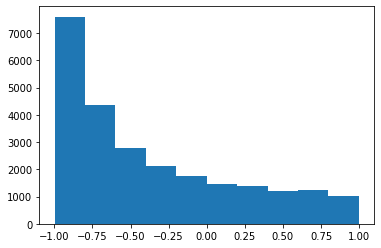

In [ ]:
plt.hist(val_preds.cpu().squeeze().numpy())

In [ ]:
df_fn_test = 'results4.csv'

In [ ]:
ts_experiment.run_grid_search(hypers, df_fn_test)

{'arch': <class 'torchtools.models.InceptionTimeD'>, 'n_epochs': 1, 'max_lr': 1e-05, 'wd': 0.03, 'loss_fn_name': 'leaky_loss', 'alpha': 0.5, 'metrics': [<function unweighted_profit at 0x7ffb4cd88d40>], 'N': 3, 'magnitude': 0.4, 'seed': 1234, 'pct_start': 0.3, 'div_factor': 25.0, 'aug': 'augmix', 'bs': 64, 'ds_id': 'bi_sample_anon_anon10hc_4c_2d_y_y0_7_9'}
pct_start: 0.3 div_factor: 25.0
[TSStandardize: (TSTensor,object) -> encodes
(NumpyTensor,object) -> encodes ]
Pipeline: TSStandardize Pipeline: TSStandardize
augmix
tfms None
False
functools.partial(<function leaky_loss at 0x7ffb4cd88830>, alpha=0.5)
Pipeline: TSStandardize -> Augmix


epoch,train_loss,valid_loss,unweighted_profit,time
0,-0.115491,0.080019,0.913272,00:05


In [ ]:
from types import 

In [ ]:
#export
def _get_arch(arch:str, with_discrete=False):
    if arch.lower()=='inception': return InceptionTimeSgm if not with_discrete else InceptionTimeD
    elif arch.lower()=='resnet': return 'ResNet not implemented'
    else: return None

In [ ]:
#export
from fastscript import *
@call_parse
def main(n_epochs:Param(help="n_epochs list", nargs='+', type=int)=[10],
         max_lr:Param(help="max_lr list", nargs='+', type=float)=[1e-5],
         wd:Param(help="wd (weight decay) hpyerparameter list", nargs='+', type=float)=[0.03],
         div_factor:Param(help="div_factor hpyerparameter list", nargs='+', type=float)=[25.0],
         seed:Param(help="seed hpyerparameter list", nargs='+', type=int)=[1234],
         N:Param(help="N hpyerparameter list", nargs='+', type=int)=[3],
         magnitude:Param(help="magnitude hpyerparameter list", nargs='+', type=float)=[0.3],
         alpha:Param(help="alpha hpyerparameter list", nargs='+', type=float)=[0.5],
         aug:Param(help="augmentation policy", choices=[None, 'randaugment', 'augmix'], type=str)=None,
         nrows:Param(help="n_epochs list", type=int)=None,
         bs:Param(help="batch size", type=int)=128,
         trn_end:Param(help="n_epochs list", type=int)=None,
         val_end:Param(help="n_epochs list", type=int)=None,
         test_end:Param(help="n_epochs list", type=int)=None,
         df_fn:Param(help="dataframe filename", type=str)='bi_sample_anon.csv',         
         df_dir:Param(help="dataframe dir", type=str)='./data/custom',
         df_results:Param(help="results dataframe filename", type=str)='results_script.csv',
         config_fn:Param(help="json column configuration filename", type=str)='config2.json',    
         config_id:Param(help="column configuration id", type=str)='anon2hc_4c_2d_y',
         arch:Param(help="model architecture", choices=['inception', 'resnet'], type=str)='inception',
         upper:Param("Convert to uppercase?", bool_arg)=False):
#     print(msg.upper() if upper else msg)
    
   
    
    train_params['aug']=aug
    
    df_path=Path(df_dir)/df_fn
    print(df_path)
    
    col_config=read_config(config_id, config_fn)
    data_params = build_data_params(df_path, col_config=col_config, nrows=nrows, trn_end=trn_end, val_end=val_end,
                                   test_end=test_end, bs=bs)
#     print(data_params)

    train_params['metrics']=[unweighted_profit, unweighted_profit_05]
    train_params['arch']=_get_arch(arch, col_config['cols_d'] is not None)
    ts_experiment = TSExperiments()
    ts_experiment.setup_data(data_params)
    ts_experiment.setup_training(train_params)
                                 
    hypers = {'n_epochs': n_epochs, 'max_lr':max_lr, 'wd':wd, 'seed': seed, 'div_factor':div_factor,
             'N':N, 'magnitude':magnitude}
    print(hypers)
    
    ts_experiment.run_grid_search(hypers, df_results)

In [ ]:
!python -m torchtools.experiments_2 --n_epochs 20 --trn_end 16000 --val_end 18500 --test_end 21000 --aug 'augmix' --bs 256 --max_lr 1e-5 --magnitude 0.4 --config_id 'anon10hc_6c_y' --arch 'inception' --df_result='results10.csv' --magnitude 0.5 --wd 0.01 0.1

data/custom/bi_sample_anon.csv
{'anon2hc_4c_2d_y': {'cols_c': [['x0_0', 'x0_1', 'x0_2', 'x0_3', 'x0_4', 'x0_5', 'x0_6', 'x0_7', 'x0_8', 'x0_9'], ['x1_0', 'x1_1', 'x1_2', 'x1_3', 'x1_4', 'x1_5', 'x1_6', 'x1_7', 'x1_8', 'x1_9'], ['x3_0', 'x3_1', 'x3_2', 'x3_3', 'x3_4', 'x3_5', 'x3_6', 'x3_7', 'x3_8', 'x3_9'], ['x4_0', 'x4_1', 'x4_2', 'x4_3', 'x4_4', 'x4_5', 'x4_6', 'x4_7', 'x4_8', 'x4_9']], 'cols_d': [['x2_0', 'x2_1', 'x2_2', 'x2_3', 'x2_4', 'x2_5', 'x2_6', 'x2_7', 'x2_8', 'x2_9'], ['x5_0', 'x5_1', 'x5_2', 'x5_3', 'x5_4', 'x5_5', 'x5_6', 'x5_7', 'x5_8', 'x5_9']], 'cols_y': 'y0', 'id': 'anon2hc_4c_2d_y'}, 'anonMODhc_4c_2d_y': {'cols_c': [['x0_0', 'x0_1', 'x0_2', 'x0_3', 'x0_4', 'x0_5', 'x0_6', 'x0_7', 'x0_8', 'x0_9'], ['x1_0', 'x1_1', 'x1_2', 'x1_3', 'x1_4', 'x1_5', 'x1_6', 'x1_7', 'x1_8', 'x1_9'], ['x3_0', 'x3_1', 'x3_2', 'x3_3', 'x3_4', 'x3_5', 'x3_6', 'x3_7', 'x3_8', 'x3_9'], ['x4_0', 'x4_1', 'x4_2', 'x4_3', 'x4_4', 'x4_5', 'x4_6', 'x4_7', 'x4_8', 'x4_9']], 'cols_d': [['x2_0', 'x2_1', 

In [ ]:
build_data_params??

In [ ]:
col_config

'6chan_anon_discrete'

In [ ]:
col_config['cols_d']

TypeError: string indices must be integers

In [ ]:
ts_experiment.run_experiment(df_fn_test)

pct_start: 0.3 div_factor: 25.0
[TSStandardize: (TSTensor,object) -> encodes
(NumpyTensor,object) -> encodes ]
Pipeline: TSStandardize Pipeline: TSStandardize
augmix
tfms None
False
functools.partial(<function leaky_loss at 0x7ffb4cd88830>, alpha=0.5)
Pipeline: TSStandardize -> Augmix


epoch,train_loss,valid_loss,unweighted_profit,time
0,-0.115491,0.080023,0.913272,00:05


not new


In [ ]:
ts_experiment.run_training()

AssertionError: must pass loss_fn_name, and n_epochs

In [ ]:
df_results=pd.read_csv(Path('./experiments/results')/df_fn_test)

In [ ]:
pd.options.display.max_columns = 99
df_results

,arch,n_epochs,max_lr,wd,loss_fn_name,alpha,metric_0,N,magnitude,seed,pct_start,div_factor,aug,bs,ds_id,trn_loss,val_loss,trn_loss_min,val_loss_min,unweighted_profit_0_value,unweighted_profit_0_max,Timestamp,val_preds
0,InceptionTimeD,1,0.00001,0.03,leaky_loss,0.5,unweighted_profit,3,0.4,1234,0.3,25.0,augmix,64,bi_sample_anon_anon10hc_4c_2d_y_y0_7_9,-0.115491,0.080019,-0.115491,0.080019,0.913272,0.913272,2020-05-27 15:14:56.653489,val_preds_9053062032374795896.pt


In [ ]:
xc, xd, y = ts_experiment.learn.dls[1].one_batch()

In [ ]:
xc.shape

torch.Size([256, 4, 10])

In [ ]:
# data_params['splits'] =  L(L(range(8000)), L(range(8000,9000)))

In [ ]:
train_params['aug']='randaugment'
train_params['verbose']=True

In [ ]:
get

In [ ]:
ts_experiments = TSExperiments(train_params)

In [ ]:
train_params

{'arch': torchtools.models.InceptionTimeD,
 'n_epochs': 5,
 'max_lr': 1e-05,
 'wd': 0.03,
 'loss_fn_name': 'leaky_loss',
 'alpha': 0.5,
 'metrics': [<function torchtools.core.unweighted_profit(preds, y_true, threshold=0)>],
 'N': 3,
 'magnitude': 0.4,
 'bs': 256,
 'seed': 1234,
 'ds_name': 'bi_sample_anon_6chan_anon_discrete_y0_120_160_200',
 'pct_start': 0.3,
 'div_factor': 25.0,
 'aug': 'randaugment',
 'verbose': True}

In [ ]:
ts_experiments.setup_data(df_main, data_params)

(218000, 4, 10) (218000, 2, 10)
<class 'torchtools.experiments.TSDatasets3'>
3
torch.Size([120000, 4, 10]) torch.Size([120000]) torch.Size([120000, 2, 10])
torch.Size([40000, 4, 10]) torch.Size([40000]) torch.Size([40000, 2, 10])
torch.Size([40000, 4, 10]) torch.Size([40000]) torch.Size([40000, 2, 10])


In [ ]:
ts_experiments.bs

256

In [ ]:
train_params.keys()

dict_keys(['arch', 'n_epochs', 'max_lr', 'wd', 'loss_fn_name', 'alpha', 'metrics', 'N', 'magnitude', 'bs', 'seed', 'ds_name', 'pct_start', 'div_factor', 'aug', 'verbose'])

In [ ]:
hypers = {'n_epochs': [1], 'max_lr':[1e-5]}

df_fn_test = 'results3.csv'

In [ ]:
TSStandardize??

In [ ]:
ts_experiments.run_grid_search(hypers, df_results_fn=df_fn_test)

{'arch': <class 'torchtools.models.InceptionTimeD'>, 'n_epochs': 1, 'max_lr': 1e-05, 'wd': 0.03, 'loss_fn_name': 'leaky_loss', 'alpha': 0.5, 'metrics': [<function unweighted_profit at 0x7efc20b5dd40>], 'N': 3, 'magnitude': 0.4, 'bs': 256, 'seed': 1234, 'ds_name': 'bi_sample_anon_6chan_anon_discrete_y0_120_160_200', 'pct_start': 0.3, 'div_factor': 25.0, 'aug': 'randaugment', 'verbose': True}
pct_start: 0.3 div_factor: 25.0
[TSStandardize: (TSTensor,object) -> encodes
(NumpyTensor,object) -> encodes ]
Pipeline: TSStandardize Pipeline: TSStandardize
randaugment
tfms None
False
functools.partial(<function leaky_loss at 0x7efc20b5d830>, alpha=0.5)
Pipeline: TSStandardize -> RandAugment


epoch,train_loss,valid_loss,unweighted_profit,time
0,-0.151885,-0.190378,-0.007342,01:12


randzoom
zoomin
ywarp
timewarp
dimout
ynormal
zoomout
ywarp
randzoom
dimout
yscale
cutout
randomcrop
yscale
ywarp
zoomout
timenormal torch.Size([128, 4, 10])
timewarp
crop
yscale
ywarp
crop
zoomout
cutout
timestepzero
zoomout
randomcrop
randomcrop
maskout
timenormal torch.Size([128, 4, 10])
cutout
timenormal torch.Size([128, 4, 10])
timestepzero
timestepzero
yscale
zoomout
ywarp
timestepzero
timewarp
maskout
randtimestep
timewarp
ywarp
zoomout
randtimestep
cutout
randtimestep
timestepzero
yscale
randomcrop
zoomout
dimout
ynormal
ywarp
randzoom
dimout
randomcrop
timestepzero
zoomout
randomcrop
randtimestep
timewarp
ywarp
cutout
randzoom
timestepzero
ynormal
randomcrop
timestepzero
timestepzero
crop
ywarp
ynormal
zoomin
crop
ynormal
dimout
randzoom
cutout
ynormal
zoomout
timestepzero
dimout
timewarp
randtimestep
zoomin
randzoom
yscale
randomcrop
maskout
crop
randomcrop
ywarp
ywarp
yscale
zoomin
dimout
randomcrop
zoomin
cutout
randomcrop
zoomout
zoomin
ywarp
timewarp
timenormal torch.Size

cutout
yscale
cutout
dimout
dimout
crop
maskout
ywarp
timestepzero
randtimestep
zoomin
randzoom
crop
zoomin
timestepzero
randzoom
ynormal
zoomin
zoomout
timewarp
randtimestep
cutout
randtimestep
crop
yscale
randtimestep
ynormal
yscale
randtimestep
cutout
zoomin
ynormal
cutout
randzoom
timewarp
maskout
randomcrop
randzoom
zoomin
zoomout
crop
randzoom
yscale
randzoom
timestepzero
timenormal torch.Size([128, 4, 10])
ynormal
timestepzero
yscale
timewarp
timenormal torch.Size([128, 4, 10])
randomcrop
ywarp
randtimestep
zoomout
dimout
timewarp
crop
zoomin
yscale
randtimestep
crop
zoomout
cutout
timewarp
cutout
timenormal torch.Size([128, 4, 10])
timestepzero
randtimestep
randzoom
zoomin
timenormal torch.Size([128, 4, 10])
randtimestep
crop
randzoom
ynormal
randzoom
yscale
randtimestep
yscale
zoomin
randzoom
yscale
timewarp
dimout
randomcrop
timestepzero
timewarp
timenormal torch.Size([128, 4, 10])
cutout
ywarp
maskout
zoomout
timenormal torch.Size([128, 4, 10])
yscale
randomcrop
zoomout
mask

randomcrop
randzoom
dimout
randtimestep
randomcrop
ywarp
randtimestep
zoomin
cutout
yscale
zoomout
randtimestep
ywarp
zoomout
crop
timestepzero
ywarp
randtimestep
randtimestep
timewarp
timestepzero
dimout
zoomin
timenormal torch.Size([128, 4, 10])
timewarp
cutout
timestepzero
timewarp
dimout
zoomin
timestepzero
ywarp
zoomout
randtimestep
randomcrop
timewarp
timewarp
cutout
randzoom
randzoom
timestepzero
zoomin
timenormal torch.Size([128, 4, 10])
randzoom
maskout
zoomout
timewarp
randomcrop
cutout
dimout
randzoom
randtimestep
crop
randzoom
timestepzero
crop
cutout
ywarp
ynormal
dimout
zoomin
ynormal
randzoom
crop
maskout
randomcrop
crop
timestepzero
randzoom
timewarp
dimout
ywarp
randomcrop
zoomin
dimout
cutout
ynormal
zoomout
yscale
ynormal
timewarp
randtimestep
randomcrop
timewarp
ynormal
cutout
maskout
zoomin
timenormal torch.Size([128, 4, 10])
zoomout
zoomout
timenormal torch.Size([128, 4, 10])
cutout
ynormal
zoomin
ywarp
timenormal torch.Size([128, 4, 10])
randomcrop
ywarp
dimout
m

ynormal
randzoom
yscale
dimout
timestepzero
randtimestep
dimout
crop
randomcrop
dimout
maskout
timenormal torch.Size([128, 4, 10])
maskout
yscale
timewarp
ynormal
randomcrop
randzoom
crop
yscale
timewarp
randzoom
dimout
zoomout
timenormal torch.Size([128, 4, 10])
maskout
timestepzero
ywarp
randomcrop
maskout
zoomin
timestepzero
dimout
randomcrop
zoomin
maskout
randtimestep
ywarp
maskout
yscale
dimout
timewarp
maskout
zoomout
timewarp
maskout
timestepzero
randtimestep
ywarp
randomcrop
timestepzero
randomcrop
ynormal
timestepzero
zoomin
ywarp
maskout
zoomout
zoomin
randtimestep
ywarp
ynormal
timestepzero
cutout
maskout
timenormal torch.Size([128, 4, 10])
yscale
zoomin
timestepzero
cutout
maskout
ynormal
timenormal torch.Size([128, 4, 10])
dimout
zoomin
randomcrop
crop
timestepzero
timenormal torch.Size([128, 4, 10])
maskout
yscale
timewarp
crop
randtimestep
timenormal torch.Size([128, 4, 10])
ywarp
zoomout
dimout
ywarp
ynormal
ynormal
crop
randomcrop
yscale
ynormal
dimout
cutout
maskout


In [ ]:
ts_experiments.learn.dls.after_batch.tfms

[YWarp: (TSIntTensor,object) -> encodes
 (TSTensor,object) -> encodes , YNormal: (TSIntTensor,object) -> encodes
 (TSTensor,object) -> encodes , YScale: (TSIntTensor,object) -> encodes
 (TSTensor,object) -> encodes , TimeWarp: (TSIntTensor,object) -> encodes
 (TSTensor,object) -> encodes , TimeNormal: (TSTensor,object) -> encodes , Dimout: (TSIntTensor,object) -> encodes
 (TSTensor,object) -> encodes , Cutout: (TSIntTensor,object) -> encodes
 (TSTensor,object) -> encodes , TimestepZero: (TSIntTensor,object) -> encodes
 (TSTensor,object) -> encodes , Crop: (TSIntTensor,object) -> encodes
 (TSTensor,object) -> encodes , RandomCrop: (TSIntTensor,object) -> encodes
 (TSTensor,object) -> encodes , Maskout: (TSIntTensor,object) -> encodes
 (TSTensor,object) -> encodes , Zoomin: (TSIntTensor,object) -> encodes
 (TSTensor,object) -> encodes , Zoomout: (TSIntTensor,object) -> encodes
 (TSTensor,object) -> encodes , RandZoom: (TSIntTensor,object) -> encodes
 (TSTensor,object) -> encodes , RandTi

In [ ]:
xc,xd,yb = ts_experiments.learn.dls.one_batch()

weights [0.19249035 0.22298341 0.58452624], m 0.23224278480041766
ops in step 0 [RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randtimestep
yscale
crop
ops in step 1 [YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ynormal
ops in step 2 [Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomin
timestepzero
weights [0.1724217  0.20476278 0.62281552], m 0.9112778892979606
ops in step 0 [YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
yscale
cutout
ops in step 1 [TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YSc

In [ ]:
ts_experiments.run_grid_search(hypers, df_results_fn=df_fn_test)

{'arch': <class 'torchtools.models.InceptionTimeD'>, 'n_epochs': 2, 'max_lr': 1e-05, 'wd': 0.03, 'loss_fn_name': 'leaky_loss', 'alpha': 0.5, 'metrics': [<function unweighted_profit at 0x7fe0f95badd0>], 'N': 3, 'magnitude': 0.4, 'bs': 128, 'seed': 1234, 'ds_name': 'bi_sample_anon_6chan_anon_discrete_y0_120_160_200', 'pct_start': 0.3, 'div_factor': 25.0, 'aug': 'augmix', 'verbose': True}
pct_start: 0.3 div_factor: 25.0
[TSStandardize: (TSTensor,object) -> encodes
(NumpyTensor,object) -> encodes ]
Pipeline: TSStandardize Pipeline: TSStandardize
augmix
tfms None
False
functools.partial(<function leaky_loss at 0x7fe0f95ba8c0>, alpha=0.5)
Pipeline: TSStandardize -> Augmix


epoch,train_loss,valid_loss,unweighted_profit,time
0,-0.095084,-0.000864,1.353308,00:06
1,-0.169261,0.016647,1.220281,00:06


weights [0.12069069 0.55244944 0.32685987], m 0.4964742723937071
ops in step 0 [TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timestepzero
randtimestep
yscale
ops in step 1 [RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randomcrop
yscale
ops in step 2 [TimeNormal: (TSTensor,object) -> encodes ]
timenormal torch.Size([128, 4, 10])
weights [0.09596037 0.3006876  0.60335203], m 0.9468840301872898
ops in step 0 [Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomin
ops in step 1 [TimeNormal: (TSTensor,object) -> encodes
 Dimout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timenormal torch.Size([128, 2, 10])
dimout
ops in step 2 [Maskout: (TSIntTensor,object) -> encodes
(TSTen

ops in step 2 [RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randtimestep
weights [0.36183297 0.11189329 0.52627374], m 0.28000372091087505
ops in step 0 [YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
yscale
maskout
ops in step 1 [Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
crop
ops in step 2 [Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
crop
zoomin
weights [0.54311766 0.19290497 0.26397737], m 0.19061532457255295
ops in step 0 [Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
crop
zoomin
ops in step 1 [YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandZoom: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
yscale
rand

weights [0.14219935 0.28489953 0.57290113], m 0.44482877974484847
ops in step 0 [Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomin
ywarp
timewarp
ops in step 1 [RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randomcrop
ops in step 2 [RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randtimestep
weights [0.05411261 0.39699056 0.54889683], m 0.5970595951460437
ops in step 0 [YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ynormal
ops in step 1 [Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomin
cutout
ops in step 2 [Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
maskout
weights [0.7222203  0.25429657 0.02348313], m 0.13117

weights [0.53856419 0.42008207 0.04135373], m 0.8837306366479485
ops in step 0 [Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomin
timewarp
ops in step 1 [RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randtimestep
crop
ops in step 2 [RandZoom: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randzoom
weights [0.292744   0.68414425 0.02311175], m 0.6111799990106732
ops in step 0 [TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timewarp
ops in step 1 [YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ynormal
ops in step 2 [YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
yscale
ynormal
weights [0.13615377 0.73312451 0.13072172], m 0.60697716

weights [0.05498763 0.8929844  0.05202797], m 0.2892986887372791
ops in step 0 [YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Dimout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ynormal
dimout
zoomout
ops in step 1 [Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomout
ops in step 2 [TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timestepzero
weights [0.43481255 0.42064778 0.14453967], m 0.8399734481702399
ops in step 0 [RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randtimestep
ops in step 1 [YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
yscale
ops in step 2 [RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randtimestep
weights [0.4023701  0.22462517 0.37300474], m 0.18097081861684775
ops in step 0 [TimeWarp: (TSIntTensor,object) ->

ops in step 1 [Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
maskout
ops in step 2 [YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Dimout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
yscale
dimout
timewarp
weights [0.33288446 0.57351073 0.0936048 ], m 0.37166436931122276
ops in step 0 [Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimeNormal: (TSTensor,object) -> encodes ]
maskout
randtimestep
timenormal torch.Size([128, 2, 10])
ops in step 1 [RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randtimestep
ops in step 2 [RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Dimout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randtimestep
dimout
weights [0.0808892  0.10670357 0.812

weights [0.833598   0.14441798 0.02198402], m 0.10949426690480167
ops in step 0 [YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ynormal
ops in step 1 [Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
crop
ynormal
ops in step 2 [Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomin
ywarp
weights [0.48463814 0.39655137 0.11881049], m 0.8745266593524675
ops in step 0 [TimeNormal: (TSTensor,object) -> encodes ]
timenormal torch.Size([128, 2, 10])
ops in step 1 [Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
maskout
ops in step 2 [Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
crop
weights [0.21650948 0.01783831 0.76565221], m 0.07393646282460048
ops in step 0 [Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YNormal: (T

ops in step 2 [YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ywarp
weights [0.03875483 0.07180667 0.8894385 ], m 0.4585558247122264
ops in step 0 [TimeNormal: (TSTensor,object) -> encodes
 YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timenormal torch.Size([128, 4, 10])
yscale
ops in step 1 [YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ynormal
cutout
ops in step 2 [RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randomcrop
weights [0.16147287 0.43529661 0.40323052], m 0.5392888955040529
ops in step 0 [Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomin
timestepzero
ops in step 1 [TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encode

weights [0.38782915 0.44196385 0.170207  ], m 0.5703429898578228
ops in step 0 [RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randomcrop
ops in step 1 [Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
maskout
timewarp
randomcrop
ops in step 2 [YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
yscale
timestepzero
zoomout
weights [0.28156206 0.37918538 0.33925256], m 0.7847754588949705
ops in step 0 [TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timestepzero
yscale
ops in step 1 [YWarp: (TSIntTensor,object) -> encodes
(TSTensor,o

weights [0.52376694 0.14937016 0.3268629 ], m 0.22960201364383345
ops in step 0 [YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandZoom: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ynormal
randzoom
ops in step 1 [TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timewarp
ops in step 2 [YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ywarp
randomcrop
weights [0.25353343 0.56229304 0.18417353], m 0.2509990363227259
ops in step 0 [YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ywarp
ops in step 1 [Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
crop
ops in step 2 [YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ynorma

weights [0.42106119 0.17272874 0.40621007], m 0.14583353106407512
ops in step 0 [Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomin
ynormal
ops in step 1 [TimeNormal: (TSTensor,object) -> encodes ]
timenormal torch.Size([128, 4, 10])
ops in step 2 [TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timewarp
randtimestep
weights [0.40483518 0.05063975 0.54452507], m 0.7852789135836744
ops in step 0 [RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randomcrop
ops in step 1 [TimeNormal: (TSTensor,object) -> encodes ]
timenormal torch.Size([128, 2, 10])
ops in step 2 [Dimout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> 

weights [0.23454392 0.18503727 0.58041881], m 0.12864340838580923
ops in step 0 [RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randomcrop
ops in step 1 [Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandZoom: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomin
randzoom
ynormal
ops in step 2 [RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandZoom: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randomcrop
randzoom
weights [0.38221736 0.34027273 0.27750991], m 0.4144329713997862
ops in step 0 [Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
maskout
ops in step 1 [RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randomcrop
cutout
ops in step 2 [Maskout: (TSIntTensor,object) -> encodes
(TST

weights [0.10444148 0.75591782 0.1396407 ], m 0.46649219915624374
ops in step 0 [Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomin
maskout
zoomout
ops in step 1 [TimeNormal: (TSTensor,object) -> encodes
 RandZoom: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timenormal torch.Size([128, 4, 10])
randzoom
ops in step 2 [YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Dimout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ywarp
dimout
randomcrop
weights [0.62949586 0.3075981  0.06290604], m 0.7793084502910711
ops in step 0 [TimeNormal: (TSTensor,object) -> encodes
 Dimout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timenormal torch.Size([128, 2, 10])
dimout
ops in step 1 [Zoom

weights [0.04171741 0.05979662 0.89848597], m 0.8774144633533665
ops in step 0 [Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
maskout
ops in step 1 [Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomout
ops in step 2 [Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
maskout
ynormal
ywarp
weights [0.0266405  0.17664651 0.79671299], m 0.43368474018891734
ops in step 0 [Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomin
crop
ops in step 1 [TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timewarp
randtimestep
ops in step 2 [YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> en

weights [0.88726721 0.09142985 0.02130294], m 0.7628493978982696
ops in step 0 [Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
cutout
ywarp
randomcrop
ops in step 1 [TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timestepzero
ops in step 2 [Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
maskout
weights [0.23764613 0.4627811  0.29957277], m 0.371381675907249
ops in step 0 [Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimeNormal: (TSTensor,object) -> encodes ]
zoomout
timenormal torch.Size([128, 2, 10])
ops in step 1 [Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
cutout
ops in step 2 [Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomin
weights [0.35124496 0.46140027 0.18735476], m 0.47359177902

weights [0.40860271 0.23747431 0.35392297], m 0.2220175497976628
ops in step 0 [RandZoom: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randzoom
ops in step 1 [TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimeNormal: (TSTensor,object) -> encodes
 Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timewarp
timenormal torch.Size([128, 4, 10])
zoomin
ops in step 2 [TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Dimout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timestepzero
dimout
randtimestep
weights [0.33150604 0.44081341 0.22768055], m 0.3558506231773939
ops in step 0 [YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ywarp
ops in step 1 [TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]

weights [0.16784114 0.40118121 0.43097765], m 0.10441148757315581
ops in step 0 [TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timestepzero
crop
ynormal
ops in step 1 [YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ywarp
crop
ops in step 2 [YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ywarp
crop
weights [0.0715563  0.27648085 0.65196285], m 0.6285719200594324
ops in step 0 [Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
cutout
ops in step 1 [Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimeNormal: (TSTensor,object) -> encodes
 Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encod

not new


In [ ]:
xbs = ts_experiments.dls.after_batch[0](xb)

In [ ]:
p = ts_experiments.dls.after_batch

In [ ]:
Pipeline??

In [ ]:
compose_tfms(xb, p, split_idx=0)

weights [0.07832728 0.57126234 0.35041038], m 0.03859473643731344
ops in step 0 [YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimeNormal: (TSTensor,object) -> encodes ]
yscale
timewarp
timenormal torch.Size([128, 4, 10])
ops in step 1 [YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ynormal
ops in step 2 [TimeNormal: (TSTensor,object) -> encodes ]
timenormal torch.Size([128, 4, 10])


TSTensor([[[-0.0072,  0.0366,  0.0059,  ...,  0.0804,  0.0284,  0.0023],
         [-0.0338,  0.1043,  0.1340,  ...,  0.0086,  0.0221,  0.0226],
         [ 0.0247,  0.0898,  0.0891,  ...,  0.0290, -0.0932,  0.0233],
         [ 0.0205, -0.0366,  0.0350,  ...,  0.0738,  0.0173,  0.0175]],

        [[ 0.0050,  0.0460,  0.0304,  ...,  0.0684,  0.0551, -0.0158],
         [-0.0257,  0.1073,  0.1560,  ...,  0.0086,  0.0218,  0.0224],
         [ 0.0484,  0.1165,  0.0962,  ...,  0.0359, -0.0837,  0.0050],
         [ 0.0579, -0.0103,  0.0170,  ...,  0.0744,  0.0170,  0.0173]],

        [[ 0.0029,  0.0246,  0.0254,  ...,  0.0557,  0.0748,  0.0023],
         [-0.0077,  0.1022,  0.1411,  ..., -0.0052,  0.0234,  0.0226],
         [ 0.0484,  0.1154,  0.1139,  ...,  0.0199, -0.0690,  0.0233],
         [ 0.0579, -0.0148,  0.0457,  ...,  0.0749,  0.0172,  0.0175]],

        ...,

        [[-0.0008,  0.0458,  0.0304,  ...,  0.0684,  0.0551, -0.0158],
         [-0.0451,  0.1077,  0.1559,  ...,  0.0086,  0.

In [ ]:
ts_experiments.dls.after_batch[1](xbs)

weights [0.32536308 0.04528067 0.62935625], m 0.5590176479614829
ops in step 0 [YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimeNormal: (TSTensor,object) -> encodes ]
ynormal
timenormal torch.Size([128, 4, 10])
ops in step 1 [YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ynormal
yscale
ops in step 2 [TimeNormal: (TSTensor,object) -> encodes
 YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timenormal torch.Size([128, 4, 10])
yscale
ynormal


TSTensor([[[-0.0437, -0.0329,  0.0056,  ...,  0.0345,  0.0015,  0.0726],
         [ 0.0055,  0.0702, -0.0085,  ...,  0.0191, -0.0207, -0.0069],
         [ 0.0177,  0.0196,  0.0302,  ...,  0.0214, -0.0053, -0.0070],
         [ 0.0546, -0.0541,  0.0097,  ...,  0.0021,  0.0398, -0.0182]],

        [[-0.0312, -0.0214,  0.0278,  ...,  0.0242,  0.0282,  0.0540],
         [ 0.0137,  0.0724,  0.0101,  ...,  0.0189, -0.0209, -0.0070],
         [ 0.0420,  0.0469,  0.0389,  ...,  0.0283,  0.0042, -0.0257],
         [ 0.0928, -0.0290, -0.0166,  ...,  0.0062,  0.0389, -0.0184]],

        [[-0.0334, -0.0415,  0.0272,  ...,  0.0120,  0.0455,  0.0726],
         [ 0.0322,  0.0701,  0.0017,  ...,  0.0039, -0.0204, -0.0069],
         [ 0.0420,  0.0459,  0.0560,  ...,  0.0169,  0.0185, -0.0070],
         [ 0.0928, -0.0324,  0.0209,  ...,  0.0074,  0.0388, -0.0182]],

        ...,

        [[-0.0371, -0.0214,  0.0279,  ...,  0.0242,  0.0282,  0.0540],
         [-0.0061,  0.0719,  0.0101,  ...,  0.0189, -0.

In [ ]:
ts_experiments.learn.dls.after_batch(xb[:2])

tensor([[[-9.1191e-01, -7.5193e-01, -1.6542e+00, -3.6954e+00, -4.2795e-01,
          -2.9532e+00,  1.3520e+00,  1.3520e+00, -2.0084e+00,  1.3520e+00],
         [-5.9138e-01,  1.5934e-02, -1.6336e+00, -1.3202e+00, -1.4686e+00,
          -1.2688e+00,  1.5934e-02,  1.5934e-02,  1.5934e-02,  1.5934e-02],
         [-4.1368e-01, -5.8321e-01, -5.0395e-01, -5.3617e-01, -1.7655e+00,
          -1.6634e-01, -7.5193e-01, -4.9402e-01, -7.1818e-01,  1.3520e+00],
         [-1.4363e+00, -1.5198e+00,  6.8398e-01,  1.5934e-02,  1.5934e-02,
          -1.4853e+00, -1.1878e+00,  1.5934e-02,  1.5934e-02,  1.5934e-02]],

        [[-1.2594e-03, -1.2594e-03, -1.2594e-03, -1.2594e-03, -1.2594e-03,
          -1.2594e-03, -1.2594e-03, -1.2594e-03, -1.2594e-03, -1.2594e-03],
         [ 6.2341e-03,  6.2341e-03,  6.2341e-03,  6.2341e-03,  6.2341e-03,
           6.2341e-03,  6.2341e-03,  6.2341e-03,  6.2341e-03,  6.2341e-03],
         [ 1.3520e+00,  1.3520e+00, -6.9005e-02, -2.3195e-01, -7.2838e-03,
          -7.2838

In [ ]:
ts_experiments.learn.dls.after_batch(xb)

TSTensor([[[ 0.0038,  0.0059, -0.0062,  ...,  0.0340, -0.0109,  0.0340],
         [ 0.0080,  0.0161, -0.0059,  ...,  0.0161,  0.0161,  0.0161],
         [ 0.0104,  0.0081,  0.0092,  ...,  0.0093,  0.0063,  0.0340],
         [-0.0033, -0.0044,  0.0251,  ...,  0.0161,  0.0161,  0.0161]],

        [[ 0.0159,  0.0159,  0.0159,  ...,  0.0159,  0.0159,  0.0159],
         [ 0.0160,  0.0160,  0.0160,  ...,  0.0160,  0.0160,  0.0160],
         [ 0.0340,  0.0340,  0.0150,  ...,  0.0158,  0.0158,  0.0158],
         [ 0.0340,  0.0161, -0.0035,  ...,  0.0160,  0.0160,  0.0160]],

        [[ 0.0138, -0.0059,  0.0097,  ..., -0.0010,  0.0340,  0.0340],
         [ 0.0340,  0.0161, -0.0059,  ..., -0.0010,  0.0161,  0.0161],
         [ 0.0340,  0.0340,  0.0340,  ..., -0.0014,  0.0340,  0.0340],
         [ 0.0340,  0.0161,  0.0340,  ...,  0.0161,  0.0161,  0.0161]],

        ...,

        [[ 0.0102,  0.0159,  0.0159,  ...,  0.0159,  0.0159,  0.0159],
         [-0.0033,  0.0160,  0.0160,  ...,  0.0160,  0.

In [ ]:
ts_experiments.dls.after_batch

Pipeline: TSStandardize -> RandAugment

In [ ]:
ts_experiments.dls.after_batch[1].tfms[7].verbose

True

In [ ]:
ts_experiments.dls.after_batch[1].tfms[7]

TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes 

In [ ]:
all_noise_augs??

In [ ]:
ts_experiments.dls.train.rng.sample(range(100),5)

[2, 49, 37, 80, 9]

In [ ]:
ts_experiments.dls.train.shuffle_fn(range(10))

[1, 8, 5, 2, 6, 9, 3, 0, 4, 7]

In [ ]:
ts_experiments.run_grid_search(hypers, df_results_fn=df_fn_test)

{'arch': <class 'torchtools.models.InceptionTimeD'>, 'n_epochs': 2, 'max_lr': 1e-05, 'wd': 0.03, 'loss_fn_name': 'leaky_loss', 'alpha': 0.5, 'metrics': [<function unweighted_profit at 0x7ff63ef91d40>], 'N': 3, 'magnitude': 0.4, 'bs': [256, 512], 'seed': 1234, 'ds_name': 'bi_sample_anon_6chan_anon_discrete_y0_120_160_200', 'pct_start': 0.3, 'div_factor': 25.0, 'aug': 'randaugment', 'verbose': True}
pct_start: 0.3 div_factor: 25.0
[TSStandardize: (TSTensor,object) -> encodes
(NumpyTensor,object) -> encodes ]
Pipeline: TSStandardize Pipeline: TSStandardize
randaugment
tfms None
False
functools.partial(<function leaky_loss at 0x7ff63ef91830>, alpha=0.5)


epoch,train_loss,valid_loss,unweighted_profit,time
0,-0.110476,-0.214162,-0.058354,00:02
1,-0.156671,-0.429254,0.517770,00:02


not new


In [ ]:
ts_experiments.dls.train.rng.sample(range(100),5)

[2, 49, 37, 80, 9]

In [ ]:
ts_experiments.dls.shuffle_fn(range(10))

[1, 8, 5, 2, 6, 9, 3, 0, 4, 7]

In [ ]:
# df_results=pd.read_csv(Path(ts_experiments.results_path)/df_fn_test)
pd.options.display.max_columns=99
df_results_fn = 'results_script.csv'
df_results=pd.read_csv(Path('./experiments/results')/df_results_fn)

In [ ]:
df_results.tail(10)

,arch,n_epochs,max_lr,wd,loss_fn_name,alpha,metric_0,N,magnitude,seed,pct_start,div_factor,aug,bs,ds_id,trn_loss,val_loss,trn_loss_min,val_loss_min,unweighted_profit_0_value,unweighted_profit_0_max,Timestamp,val_preds,test_preds,metric_1,unweighted_profit_05_1_value,unweighted_profit_05_1_max
17,InceptionTimeD,20,0.000030,0.03,leaky_loss,0.5,unweighted_profit,3,0.4,1234,0.3,25.0,augmix,256,bi_sample_anon_anon2hc_4c_2d_y_y0_159_184_209,-18.050280,0.043951,-18.147163,-0.470183,-0.329070,0.269575,2020-05-30 13:48:01.138299,val_preds_6788628568754663838.pt,test_preds_1318904782722108596.pt,unweighted_profit_05,-0.357221,0.172515
18,InceptionTimeSgm,20,0.000001,0.03,leaky_loss,0.5,unweighted_profit,3,0.4,1234,0.3,25.0,augmix,256,bi_sample_anon_anon10hc_6c_y_y0_159_184_209,-0.431231,-0.541674,-0.431231,-0.545699,0.000000,0.004000,2020-05-30 15:15:37.182025,val_preds_4479683489569052068.pt,test_preds_7938456568785952707.pt,unweighted_profit_05,0.000000,0.000000
19,InceptionTimeSgm,20,0.000003,0.03,leaky_loss,0.5,unweighted_profit,3,0.4,1234,0.3,25.0,augmix,256,bi_sample_anon_anon10hc_6c_y_y0_159_184_209,-0.749645,-0.553170,-0.749645,-0.560720,0.006079,0.021330,2020-05-30 15:28:15.611646,val_preds_5227375259696169406.pt,test_preds_6743222459383726298.pt,unweighted_profit_05,0.018571,0.023535
20,InceptionTimeSgm,20,0.000010,0.03,leaky_loss,0.5,unweighted_profit,3,0.4,1234,0.3,25.0,augmix,256,bi_sample_anon_anon10hc_6c_y_y0_159_184_209,-1.669218,-0.584452,-2.006523,-0.589079,0.052419,0.068826,2020-05-30 15:40:42.473331,val_preds_4061105692411428379.pt,test_preds_520943960830991940.pt,unweighted_profit_05,0.019160,0.026903
21,InceptionTimeSgm,20,0.000010,0.03,leaky_loss,0.5,unweighted_profit,3,0.4,1234,0.3,25.0,randaugment,256,bi_sample_anon_anon10hc_6c_y_y0_159_184_209,-0.633793,-0.518950,-0.816506,-0.540055,0.190854,0.340401,2020-05-30 17:07:00.607955,val_preds_56371489401884044.pt,test_preds_3344328793959287162.pt,unweighted_profit_05,0.021375,0.032379
22,InceptionTimeSgm,20,0.000010,0.03,leaky_loss,0.5,unweighted_profit,3,0.4,57,0.3,25.0,randaugment,256,bi_sample_anon_anon10hc_6c_y_y0_159_184_209,-0.158755,-0.329850,-0.582554,-0.342198,-0.077737,0.045496,2020-05-30 17:17:38.556912,val_preds_3178664883301807135.pt,test_preds_7780324887941289475.pt,unweighted_profit_05,0.017021,0.124087
23,InceptionTimeSgm,20,0.000010,0.03,leaky_loss,0.5,unweighted_profit,3,0.4,1234,0.3,25.0,randaugment,256,bi_sample_anon_anon10hc_6c_y_y0_159_184_209,-0.632862,-0.520318,-0.812129,-0.542052,0.236871,0.306963,2020-05-31 10:55:19.507049,val_preds_2609196857900895503.pt,test_preds_3870018942036340467.pt,unweighted_profit_05,0.009133,0.020868
24,InceptionTimeSgm,20,0.000010,0.03,leaky_loss,0.5,unweighted_profit,3,0.4,57,0.3,25.0,randaugment,256,bi_sample_anon_anon10hc_6c_y_y0_159_184_209,-0.155967,-0.334416,-0.582159,-0.342908,-0.086280,0.044007,2020-05-31 11:09:08.780391,val_preds_3175460081576098876.pt,test_preds_5040731998858053927.pt,unweighted_profit_05,0.019000,0.162037
25,InceptionTimeD,20,0.000010,0.03,leaky_loss,0.5,unweighted_profit,3,0.4,1234,0.3,25.0,randaugment,256,bi_sample_anon_anon2hc_4c_2d_y_y0_159_184_209,-0.831989,-0.652422,-1.012627,-0.652422,0.252324,0.432320,2020-05-31 13:01:12.124760,val_preds_4179460921225469682.pt,test_preds_2260158523865519255.pt,unweighted_profit_05,0.189323,0.302585
26,InceptionTimeD,20,0.000010,0.03,leaky_loss,0.5,unweighted_profit,3,0.4,57,0.3,25.0,randaugment,256,bi_sample_anon_anon2hc_4c_2d_y_y0_159_184_209,-0.316823,-0.546146,-0.721709,-0.546146,0.130424,0.378457,2020-05-31 13:16:24.771280,val_preds_2899701533973314209.pt,test_preds_1846495503424330239.pt,unweighted_profit_05,0.115906,0.271899


In [ ]:
ts_experiments.learn.dls[2].dataset

(#1000) [(TSTensor([[ -26.1780,  -82.6446,  -69.4444,  100.0000,  -26.8817,  100.0000,
          100.0000,  -21.0970,  -16.5016,  100.0000],
        [-100.0000,  -57.4713,    0.0000,  100.0000,  -58.8235,  100.0000,
          100.0000,  100.0000,    0.0000,  100.0000],
        [ -24.1546,  -65.7895,  -51.5464,  100.0000,  100.0000, -106.3830,
          -60.9756,  100.0000,  100.0000, -100.0000],
        [ 100.0000,  -42.0168,  -89.2857,  100.0000,  100.0000, -106.3830,
         -106.3830,  100.0000,  100.0000, -100.0000]]), TSIntTensor([[-1,  0,  0,  4, -1,  3,  1,  0, -1,  1],
        [ 0,  0, -1,  2,  3, -1, -5,  2,  2,  0]]), tensor(100.)),(TSTensor([[-136.9863,  -49.7512,  100.0000,  -35.9712,  -32.7869,  100.0000,
          100.0000,  -19.9601,  -65.7895,  -30.6748],
        [-102.0408,   50.0000,  100.0000, -129.8701, -119.0476,  100.0000,
          100.0000, -101.0101,  -86.9565,  100.0000],
        [ 100.0000,  -41.8410,  -51.0204,  -33.2226,  100.0000,  -23.8095,
          -34

In [ ]:
ts_experiments.learn.get_preds(2)[0]

tensor([[-0.0809],
        [-0.0809],
        [-0.0606],
        [-0.9293],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.3140],
        [-0.3140],
        [-0.2579],
        [-0.6145],
        [-0.5642],
        [-0.3821],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.3123],
        [-0.0178],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.8095],
        [-0.2521],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.1889],
        [-0.1889],
        [-0.9199],
        [ 0.0420],
        [-0.

In [ ]:
pvalid = np.round(ts_experiments.learn.get_preds(1)[0].numpy(),2)

(array([  4.,  19., 107., 216., 237., 274.,  86.,  40.,  14.,   3.]),
 array([-0.73      , -0.62600005, -0.522     , -0.418     , -0.314     ,
        -0.21000001, -0.10600001, -0.002     ,  0.102     ,  0.206     ,
         0.31      ], dtype=float32),
 <a list of 10 Patch objects>)

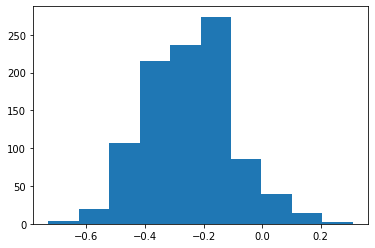

In [ ]:
plt.hist(pvalid)